# Project 2 - Programming for Data Analysis
> ## An Analysis of paleo-present climate data

To keep this project focused, I am breaking this project into 5 steps based on Faraz Mubeen's article on Medium.com from July 2023. In the ['*6 Steps of any data anlytics project*'](https://medium.com/@farazmubeen902/6-steps-of-any-data-analytics-project-bde8d8072f89), he describes the "six fundamental steps involved in any data analytics project". These are:

1. **Ask** - *Formulating the right questions*
2. **Prepare** - *Collecting and organising relevant data*
3. **Process** - *Cleaning and preparing data for analysis*
4. **Analyse** - *Uncovering patterns and insights*
5. **Share** - *Communicating insights through data visualisations*
6. **Act** - *Translating insights into actionable plans*

As the "**Ask**" has already been set by the assignment, I will be following a modified set of steps - *Prepare*, *Process*, *Analyse*, **Predict** and *Share*. 

> ### Academic References
>
> - Mubeen, F. (2023). 6 Steps of any Data Analytics Project. [online] Available at: https://medium.com/@farazmubeen902/6-steps-of-any-data-analytics-project-bde8d8072f89 [Accessed 11 Dec. 2023]. 
>
> - Mateus, C.; Potito, A.; Curley, M. 2020. Reconstruction of a long-term historical daily maximum and minimum air temperature network dataset for Ireland (1831-1968). Geoscience Data Journal. http://dx.doi.org/10.1002/gdj3.92

> ### Technical References
>
> - Javiya, R. (n.d.). How to Read Text Files with Pandas. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/how-to-read-text-files-with-pandas/ [Accessed 14 Dec. 2023]. Written by Rushi Javiya.


> ### **The Ask**: 
>
> • Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
>
> • Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
>
> • Examine Irish context:
>
> • Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)
>
> • Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats
>
> • For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
>
> • Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue
>
> • Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)
>
>Use a Jupyter notebook for your analysis and track your progress using GitHub.
>
>Use an academic referencing style

***
### 1. **Prepare** - *Collecting and organising relevant data*

#### EPICA Dome C - [*800KYr Deuterium Data and Temperature Estimates*](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt)
The first file I will create a DataFrame for is the EPICA Dome C - 800KYr Deuterium Data and Temperature Estimates data. 

I based the seperator argument from the answer I saw on a [Stack Overflow question similar to my own](https://stackoverflow.com/a/55473279).

In [1]:
# LIbrary Imports
import pandas as pd

# Path to EDC file
file_path = 'files/edc3deuttemp2007.txt'

# Create EDC DataFrame
edc = pd.read_csv(file_path, sep='\s+', skiprows=91)

edc

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [2]:
# Outputting to CSV to have instead of .txt file
edc.to_csv('files/edc3deuttemp.csv')


Next, I would like to drop the index and use the *Bag* column instead (based on [this example](https://pythonexamples.org/pandas-set-column-as-index/)).

In [3]:
edc = pd.read_csv('files/edc3deuttemp.csv', index_col='Bag', usecols=['Bag', 'ztop', 'Age', 'Deuterium', 'Temperature'])
edc

,ztop,Age,Deuterium,Temperature
Bag,,,,
1,0.00,-50.00000,NaN,NaN
2,0.55,-43.54769,NaN,NaN
3,1.10,-37.41829,NaN,NaN
4,1.65,-31.61153,NaN,NaN
5,2.20,-24.51395,NaN,NaN
...,...,...,...,...
5796,3187.25,797408.00000,-440.20,-8.73
5797,3187.80,798443.00000,-439.00,-8.54
5798,3188.35,799501.00000,-441.10,-8.88


I will now create a DataFrame for the IPCC data sourced from [this link](https://vlegalwaymayo.atu.ie/mod/url/view.php?id=874743) provided by lecturer. 

***
#### IPCC Data (Composite) - [*CO2: Antartic Ice Core*](https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls)

In [4]:
# Path to IPCC file
file_path = 'files/grl52461-sup-0003-supplementary.xls'

# Read the 'CO2 Composite' sheet starting from line 15
ipcc = pd.read_excel(file_path, sheet_name='CO2 Composite', skiprows=14, index_col=None)
ipcc

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


Jouzel et al (2007) updated some of the data from the EPICA Dome C data and I will create a DF for this also. 

***
### Jouzel et al (2007) - [*EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA*](https://doi.pangaea.de/10.1594/PANGAEA.683655)

In [5]:
# Path to IPCC file
file_path = 'files\epicaDC.deuttemp.EDC3-AICC.xls'

# Read the file
jouzel = pd.read_excel(file_path)
jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


***
### Luthi et al (2008)- [*High-resolution carbon dioxide concentration record 650,000–800,000 years before present*](https://www.nature.com/articles/nature06949) 

In [6]:
# Set file path
file_path = 'files/41586_2008_BFnature06949_MOESM31_ESM.xls'

# Read the 'Composite CO2' sheet starting from line 7
luthi = pd.read_excel(file_path, sheet_name='3.  Composite CO2', skiprows=6, index_col=None)
luthi

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


#### Note: 
I am unsure if this is the wrong thing to do but I find the '*Age*' columns to be confusing and so I will make a copy of each of my DataFrames and append '*_rev*' to each name. The purpose of this is to create a new column called IceCoreYear. I am hoping that this will make it easier to pair data with other datasets (particulary the Mauna Loa dataset). I will calculate the calendar year by using 1950 as the base year. 
***

In [7]:
# Library Imports
import math

# Create copies of DF
edc_rev = edc.copy()
ipcc_rev = ipcc.copy()
jouzel_rev = jouzel.copy()
luthi_rev = luthi.copy()

# Creating IceCoreYear columns for each DataFrame
edc_rev['IceCoreYear'] = 1950 - edc['Age']
ipcc_rev['IceCoreYear'] = 1950 - ipcc['Gasage (yr BP) ']
jouzel_rev['IceCoreYear'] = 1950 - jouzel['AICC2012']
luthi_rev['IceCoreYear'] = 1950 - luthi['EDC3_gas_a (yr)']

# Extract only the whole number part before the decimal point
edc_rev['IceCoreYear'] = edc_rev['IceCoreYear'].apply(lambda x: math.floor(x))
ipcc_rev['IceCoreYear'] = ipcc_rev['IceCoreYear'].apply(lambda x: math.floor(x))
jouzel_rev['IceCoreYear'] = jouzel_rev['IceCoreYear'].apply(lambda x: math.floor(x))
luthi_rev['IceCoreYear'] = luthi_rev['IceCoreYear'].apply(lambda x: math.floor(x))

In [8]:
# Review new column in the _rev DFs - Intentionally commented out after checking
#edc_rev
ipcc_rev
#jouzel_rev
#luthi_rev

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv),IceCoreYear
0,-51.030000,368.022488,0.060442,2001
1,-48.000000,361.780737,0.370000,1998
2,-46.279272,359.647793,0.098000,1996
3,-44.405642,357.106740,0.159923,1994
4,-43.080000,353.946685,0.043007,1993
...,...,...,...,...
1896,803925.284376,202.921723,2.064488,-801976
1897,804009.870607,207.498645,0.915083,-802060
1898,804522.674630,204.861938,1.642851,-802573
1899,805132.442334,202.226839,0.689587,-803183


Next, I will add some data from the Mauna Loa dataset, particularly the CO2 (Carbon Dioxide) and CH4 (Methane).

In [9]:
# Creating Mauna Loa CO2 DataFrame
mlco2 = pd.read_csv('files/co2_annmean_mlo.csv',skiprows=43)

# Rename 'mean' column to 'co2_mean'
mlco2.rename(columns={'mean': 'co2_mean'}, inplace=True)

In [10]:
# Creating Mauna Loa CH4 DataFrame
mlch4 = pd.read_csv('files/ch4_annmean_gl.csv',skiprows=43)

# Rename 'mean' column to 'co2_mean'
mlch4.rename(columns={'mean': 'ch4_mean'}, inplace=True)

In [11]:
mlch4

,year,ch4_mean,unc
0,1984,1644.85,0.67
1,1985,1657.29,0.59
2,1986,1670.09,0.74
3,1987,1682.70,0.49
4,1988,1693.28,0.67
5,1989,1704.53,0.55
6,1990,1714.43,0.68
7,1991,1724.78,0.72
8,1992,1735.47,0.57
9,1993,1736.53,0.46


The last data to bring in to the fold is the Irish Mean Temperature data sourced [from the CSO's MTM02 dataset](https://data.cso.ie/table/MTM02) called *Temperature*.

In [12]:
irish_temp = pd.read_csv('files/IrishMeanTempCSO.csv')
irish_temp

,Statistic Label,Month,Meteorological Weather Station,UNIT,VALUE
0,Mean Temperature,1958M01,Belmullet,Degrees C,5.9
1,Mean Temperature,1958M01,Birr,Degrees C,5.0
2,Mean Temperature,1958M01,Valentia Observatory,Degrees C,7.1
3,Mean Temperature,1958M01,Casement,Degrees C,NaN
4,Mean Temperature,1958M01,Claremorris,Degrees C,4.4
...,...,...,...,...,...
11695,Mean Temperature,2022M12,Malin head,Degrees C,5.9
11696,Mean Temperature,2022M12,Mullingar,Degrees C,3.5
11697,Mean Temperature,2022M12,Roches Point,Degrees C,6.2
11698,Mean Temperature,2022M12,Rosslare,Degrees C,NaN


As the global data I have is annual, I will calculate an annual mean for Ireland based on the data from the irish_temp DF but that will be done in section 2. 

***
### 2. *Process* - *Cleaning and preparing data for analysis*

I will first merge the IPCC data and the Mauna Loa data into one DataFrame. I will then look at the other ice core dataframes and merge them with the Mauna Loa data and plot them to do a visual check for any obvious discrepancies/flaws in the data.

In [13]:
# Merge mlco2 and mlch4 DFs based on the 'year' column
mauna_loa = pd.merge(mlco2.copy(), mlch4.copy(), on='year')

# Dropping unc_x and unc_y based on columns (axis=1)
mauna_loa.drop(['unc_x', 'unc_y'], axis=1, inplace=True)

# Check that DF looks as intended
mauna_loa

,year,co2_mean,ch4_mean
0,1984,344.87,1644.85
1,1985,346.35,1657.29
2,1986,347.61,1670.09
3,1987,349.31,1682.70
4,1988,351.69,1693.28
5,1989,353.20,1704.53
6,1990,354.45,1714.43
7,1991,355.70,1724.78
8,1992,356.54,1735.47
9,1993,357.21,1736.53


I realised a day after committing the new DataFrames from below that I had merged on the year columns rather than concatenated and that was going to result in me only illustrating the years that were common between my DataFrames. I reviewed the documenation [from Pandas on concatenation](https://pandas.pydata.org/docs/user_guide/merging.html#concatenating-objects) to inform how I approached fixing my initial errors.

Here is a screenshot from before of a sample of the code for easy reference to see what I have fixed. 
> ![Screenshot of sample of original code](files/MergingErrorScreenshot.png)


In [14]:
# Convert 'year' in mauna_loa to numeric type
mauna_loa['year'] = pd.to_numeric(mauna_loa['year'], errors='coerce')

# Convert 'IceCoreYear' in ipcc_rev to numeric type
ipcc_rev['IceCoreYear'] = pd.to_numeric(ipcc_rev['IceCoreYear'], errors='coerce')

# Create a new column 'merged_year' that combines both 'year' and 'IceCoreYear'
mauna_loa['merged_year'] = mauna_loa['year']
ipcc_rev['merged_year'] = ipcc_rev['IceCoreYear']

# Concatenate both DataFrames
ipcc_ml = pd.concat([mauna_loa, ipcc_rev], ignore_index=True)

# Sort the DataFrame by 'merged_year' in descending order
ipcc_ml = ipcc_ml.sort_values(by='merged_year', ascending=False)

# Drop the 'year' and 'IceCoreYear' columns
ipcc_ml = ipcc_ml.drop(['year', 'IceCoreYear'], axis=1)

# Rename the 'merged_year' column to 'Year'
ipcc_ml = ipcc_ml.rename(columns={'merged_year': 'Year'})

# Set the 'Year' column as the index
ipcc_ml = ipcc_ml.set_index('Year')


I will now do the same as above for the other three DFs - *edc_rev*, *jouzel_rev* and *luthi_rev*. 

In [15]:
# Commenting out the below line as this has already been done from the previous code block. 
# mauna_loa['year'] = pd.to_numeric(mauna_loa['year'], errors='coerce')

# Convert 'IceCoreYear' in edc_rev to numeric type
edc_rev['IceCoreYear'] = pd.to_numeric(edc_rev['IceCoreYear'], errors='coerce')

# Create a new column 'merged_year' that combines both 'year' and 'IceCoreYear'
mauna_loa['merged_year'] = mauna_loa['year']
edc_rev['merged_year'] = edc_rev['IceCoreYear']

# Concatenate both DataFrames
edc_ml = pd.concat([mauna_loa, edc_rev], ignore_index=True)

# Sort the DataFrame by 'merged_year' in descending order
edc_ml = edc_ml.sort_values(by='merged_year', ascending=False)

# Drop the 'year' and 'IceCoreYear' columns
edc_ml = edc_ml.drop(['year', 'IceCoreYear'], axis=1)

# Rename the 'merged_year' column to 'Year'
edc_ml = edc_ml.rename(columns={'merged_year': 'Year'})

# Set the 'Year' column as the index
edc_ml = edc_ml.set_index('Year')

In [16]:
# Convert 'IceCoreYear' in jouzel_rev to numeric type
jouzel_rev['IceCoreYear'] = pd.to_numeric(jouzel_rev['IceCoreYear'], errors='coerce')

# Create a new column 'merged_year' that combines both 'year' and 'IceCoreYear'
mauna_loa['merged_year'] = mauna_loa['year']
jouzel_rev['merged_year'] = jouzel_rev['IceCoreYear']

# Concatenate both DataFrames
jouzel_ml = pd.concat([mauna_loa, jouzel_rev], ignore_index=True)

# Sort the DataFrame by 'merged_year' in descending order
jouzel_ml = jouzel_ml.sort_values(by='merged_year', ascending=False)

# Drop the 'year' and 'IceCoreYear' columns
jouzel_ml = jouzel_ml.drop(['year', 'IceCoreYear'], axis=1)

# Rename the 'merged_year' column to 'Year'
jouzel_ml = jouzel_ml.rename(columns={'merged_year': 'Year'})

# Set the 'Year' column as the index
jouzel_ml = jouzel_ml.set_index('Year')

In [17]:
# Convert 'IceCoreYear' in luthi_rev to numeric type
luthi_rev['IceCoreYear'] = pd.to_numeric(luthi_rev['IceCoreYear'], errors='coerce')

# Create a new column 'merged_year' that combines both 'year' and 'IceCoreYear'
mauna_loa['merged_year'] = mauna_loa['year']
luthi_rev['merged_year'] = luthi_rev['IceCoreYear']

# Concatenate both DataFrames
luthi_ml = pd.concat([mauna_loa, luthi_rev], ignore_index=True)

# Sort the DataFrame by 'merged_year' in descending order
luthi_ml = luthi_ml.sort_values(by='merged_year', ascending=False)

# Drop the 'year' and 'IceCoreYear' columns
luthi_ml = luthi_ml.drop(['year', 'IceCoreYear'], axis=1)

# Rename the 'merged_year' column to 'Year'
luthi_ml = luthi_ml.rename(columns={'merged_year': 'Year'})

# Set the 'Year' column as the index
luthi_ml = luthi_ml.set_index('Year')

I now have created four new DataFrames - *ipcc_ml*, *edc_ml*, *jouzel_ml*, *luthi_ml*. The year and IceCoreYear columns are still not merged but that is the next tidying up job. Once I have that tidied, I will move on to step 3 and start with some plotting to see how it looks.

In [18]:
# Uncomment any of the below to test if the previous code block worked
#edc_ml
#ipcc_ml
#jouzel_ml
luthi_ml

,co2_mean,ch4_mean,EDC3_gas_a (yr),CO2 (ppmv)
Year,,,,
2022,418.53,1911.83,NaN,NaN
2021,416.41,1895.28,NaN,NaN
2020,414.21,1878.93,NaN,NaN
2019,411.65,1866.58,NaN,NaN
2018,408.72,1857.33,NaN,NaN
...,...,...,...,...
-792658,NaN,NaN,794608.0,199.4
-793252,NaN,NaN,795202.0,195.2
-794517,NaN,NaN,796467.0,189.3


***
### 3. *Analyse* - *Uncovering patterns and insights*

In [19]:
# Library Imports - Plotting libraries (may change over time)
import matplotlib.pyplot as plt

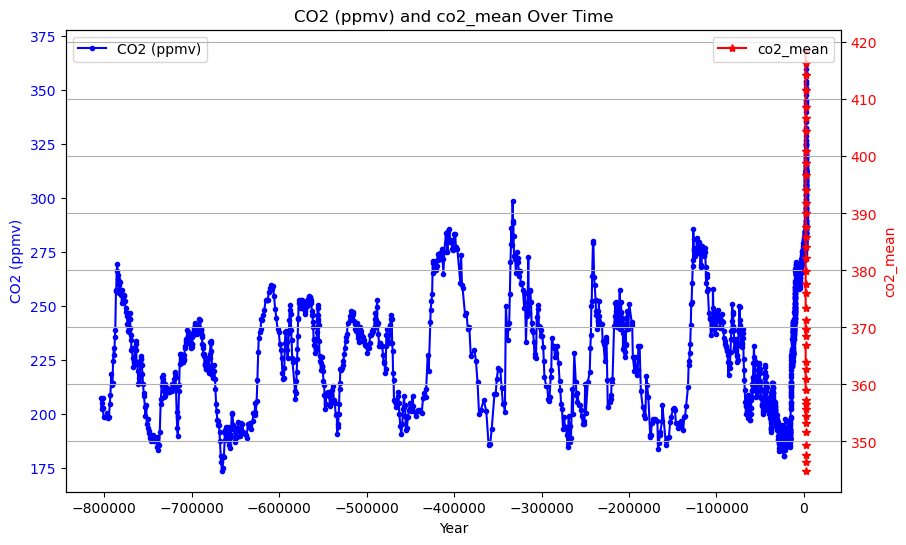

In [22]:
# First Attempt At Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot on the first y-axis
ax1.plot(ipcc_ml.index, ipcc_ml['CO2 (ppmv)'], label='CO2 (ppmv)', marker='.', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 (ppmv)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(ipcc_ml.index, ipcc_ml['co2_mean'], label='co2_mean', marker='*', color='red')
ax2.set_ylabel('co2_mean', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Set title of plot and show it
plt.title('CO2 (ppmv) and co2_mean Over Time')
plt.grid(True)
plt.show()

Utilising [Matplotlib's xlim function](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html#sphx-glr-gallery-subplots-axes-and-figures-shared-axis-demo-py), I wanted to check what the data looks like visually from 1950 onwards. It is much the same script as above with the exception of the line *```plt.xlim(1950, max(ipcc_ml.index))```*.

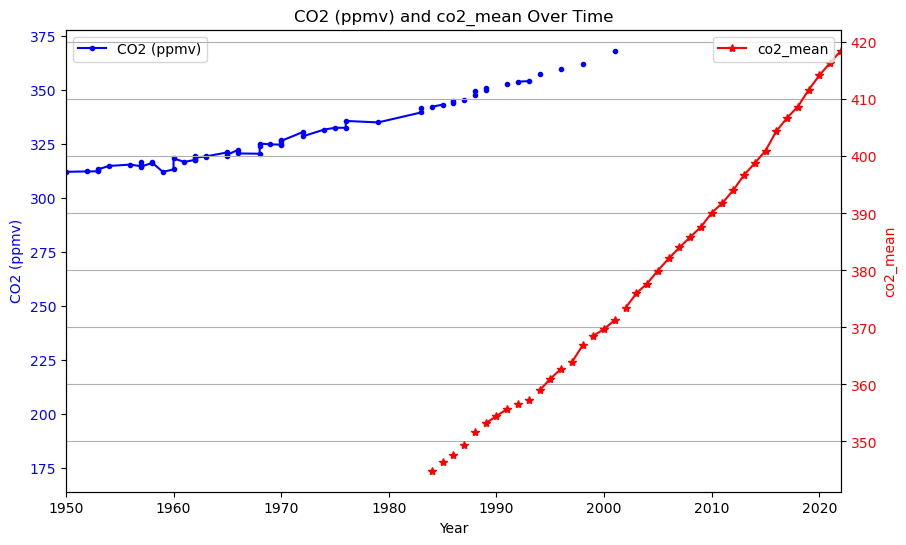

In [25]:
# Setting for second plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot on the first y-axis
ax1.plot(ipcc_ml.index, ipcc_ml['CO2 (ppmv)'], label='CO2 (ppmv)', marker='.', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 (ppmv)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(ipcc_ml.index, ipcc_ml['co2_mean'], label='co2_mean', marker='*', color='red')
ax2.set_ylabel('co2_mean', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Set x-axis limits to show only from 1950 onwards
plt.xlim(1950, max(ipcc_ml.index))

# Set title of plot and show it
plt.title('CO2 (ppmv) and co2_mean Over Time')
plt.grid(True)
plt.show()
